# Question 1

In [59]:
import numpy as np
import scipy.linalg as linalg
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt

In [60]:
eta = 1
k =  3
m = 1.0
param = (eta/m)**2 - 4*k/m
print(param)

-11.0


In [61]:
p0 = 2.
v0 = 0.01
t = np.linspace(0,10,100)
MA = np.array([[0,1], [-k/m,-eta/m]])
x0 = np.array([p0,v0])
x = np.zeros((t.shape[0],2))
for i in range(t.shape[0]):
    x[i,:] = linalg.expm(MA*t[i])@x0

In [66]:
dt = 0.9
F = linalg.expm(MA*dt)   # page 15 lecture 8  ## we only need to compute this once
t_d = np.arange(0,10,dt)
x_d = np.zeros((len(t_d), 2))
x_d[0,:] = x0
for n in range(1,len(t_d)):
    x_d[n,:] = F @ x_d[n-1,:] 



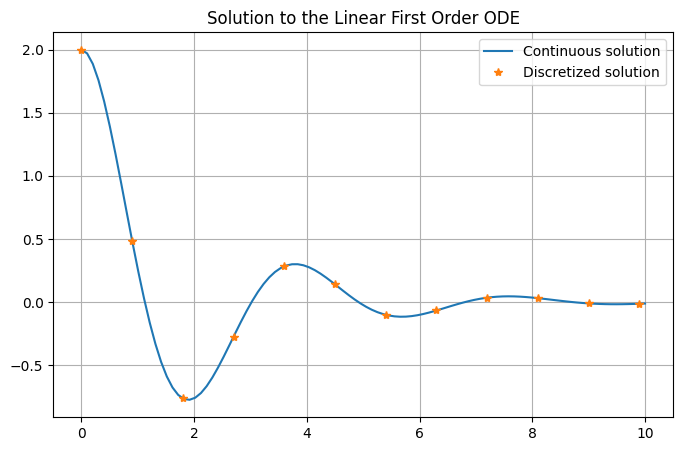

In [67]:
plt.figure(figsize=(8,5))
plt.plot(t,x[:,0], label = "Continuous solution")
plt.plot(t_d,x_d[:,0],'*', label = "Discretized solution")
plt.grid()
plt.title('Solution to the Linear First Order ODE')
plt.legend();

In [12]:
# there is no discretization error because this is the exact solution of ode at discretization points.

# Question 2
p21/27/28/32

In [68]:
dt_Q2  = 0.1
sigma_w = 0.1
F_wiener = np.array([ [1, dt_Q2],
                      [0, 1] ])
Q_wiener = sigma_w * np.array([ [dt_Q2**3/3, dt_Q2**2/2],
                                [dt_Q2**2/2, dt_Q2] ])
print("F_wiener = \n", F_wiener)
print("Q_wiener = \n", Q_wiener)

F_wiener = 
 [[1.  0.1]
 [0.  1. ]]
Q_wiener = 
 [[3.33333333e-05 5.00000000e-04]
 [5.00000000e-04 1.00000000e-02]]


Discretized stochastic dynamic model:
$$
\mathbf{x}_n = \mathbf{F}_n \, \mathbf{x}_{n-1} + \mathbf{q}_n, \qquad \mathbf{q}_n \sim \mathcal{N}(0, \mathbf{Q}_n)
$$

In [74]:
m0 = np.array([0,1])
P0 = 0.01 * np.eye(2)

n_tr = 1000

t_wiener = np.arange(0,5,dt_Q2)
xs = np.zeros((n_tr,len(t_wiener),2))


In [75]:
xs.shape

(1000, 50, 2)

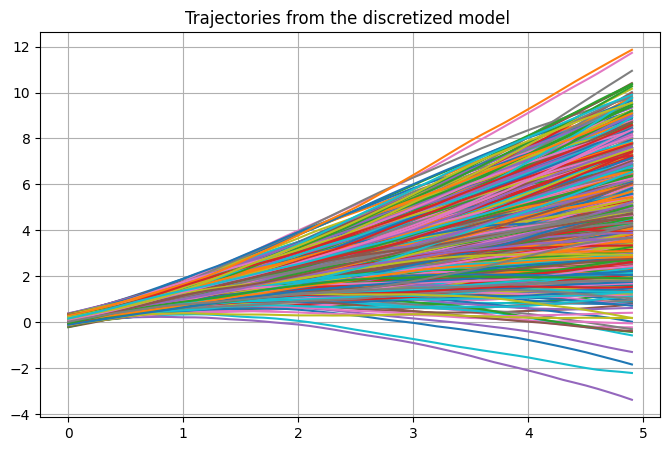

In [76]:
plt.figure(figsize=(8,5))
for i in range(n_tr):
    x_ = np.random.multivariate_normal(m0, P0)
    xs[i, 0, :] = x_
    for n in range(len(t_wiener)):
        q = np.random.multivariate_normal(np.zeros(2),Q_wiener)
        x_ = F_wiener @ x_ + q
        xs[i,n,:] = x_
    plt.plot(t_wiener,xs[i,:,0] )
plt.grid()
plt.title('Trajectories from the discretized model ');

In [77]:
# You can also use:
#     L0 = linalg.cholesky(P0, lower=True) # Recall: Q0 = L0 @ L0.T
#     x_ = m0 + L0 @ np.random.normal(size=(m0.shape))

In [78]:
#emprically
mean1 = np.zeros((len(t_wiener),2))
cov1 = np.zeros((len(t_wiener),2,2))

for i in range(len(t_wiener)):
    mean1[i, :] = np.mean(xs[:, i, :],axis=0) 
    cov1[i, :, :] = np.cov(xs[:,i,:], rowvar=False)
    
# Formulation
mean2 = np.zeros((len(t_wiener),2))
cov2 = np.zeros((len(t_wiener),2,2))
m = m0
P = P0
for i in range(len(t_wiener)):
    mean2[i, :] = m
    cov2[i, :, :] = P
    m = F_wiener @ m
    P = F_wiener @ P @ F_wiener.T + Q_wiener


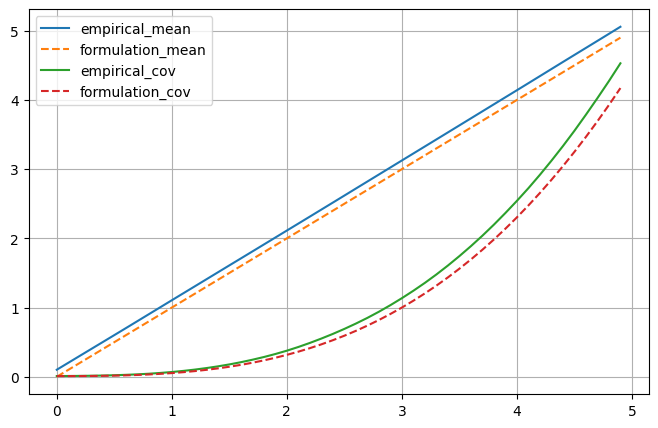

In [79]:
plt.figure(figsize=(8,5))
plt.plot(t_wiener,mean1[:,0], label= 'empirical_mean')
plt.plot(t_wiener,mean2[:,0], '--', label= 'formulation_mean')

plt.plot(t_wiener,cov1[:,0,0], label= 'empirical_cov')
plt.plot(t_wiener,cov2[:,0,0],'--', label= 'formulation_cov')
plt.legend()
plt.grid();

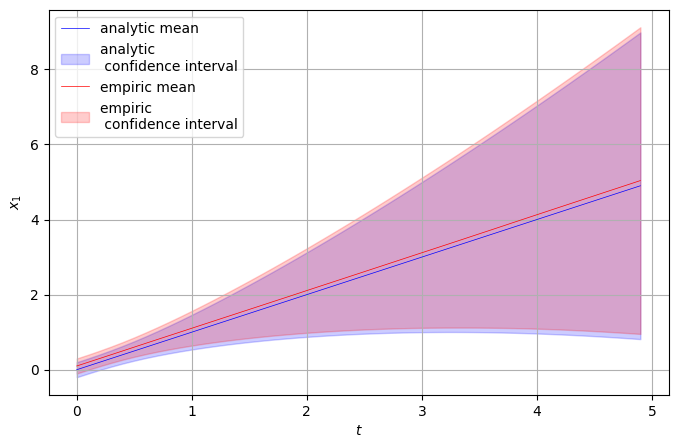

In [34]:
plt.figure(figsize=(8,5))
plt.plot(t_wiener,mean2[:,0],'-b',label='analytic mean', linewidth=0.5)
plt.fill_between(t_wiener,mean2[:,0]+2*np.sqrt(cov2[:,0,0]),mean2[:,0]-2*np.sqrt(cov2[:,0,0]),color='blue',alpha=0.2,label='analytic \n confidence interval')
plt.plot(t_wiener,mean1[:,0],'-r',label='empiric mean', linewidth=0.5)
plt.fill_between(t_wiener,mean1[:,0]+2*np.sqrt(cov2[:,0,0]),mean1[:,0]-2*np.sqrt(cov2[:,0,0]),color='red',alpha=0.2,label='empiric \n confidence interval')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$x_1$');


# Question 3

In [80]:
f_robot = lambda x,u: np.array( [u[0]*np.cos(x[2]), 
                                 u[0]*np.sin(x[2]), 
                                 u[1]] )
 

In [81]:
x_robot_0 = np.array([0.,0.,0.])
t_robot = np.linspace(0.,5.,501)
dt_robot = t_robot[1]-t_robot[0]

In [82]:
def u(tr):
    ur = np.zeros((t_robot.shape[0],2))
    for n, t in enumerate(tr):
        if 0 <= t < 1:
            u1 = t
            u2 = 0
        if 1 <= t < 2:
            u1 = 1
            u2 = 0
        if 2 <= t < 3:
            u1 = 1
            u2 = math.pi/2
        if 3 <= t < 4:
            u1 = 1
            u2 = 0
        if 4 <= t < 5:
            u1 = 5 - t
            u2 = 0
        ur[n, 0] = u1
        ur[n, 1] = u2
    return ur

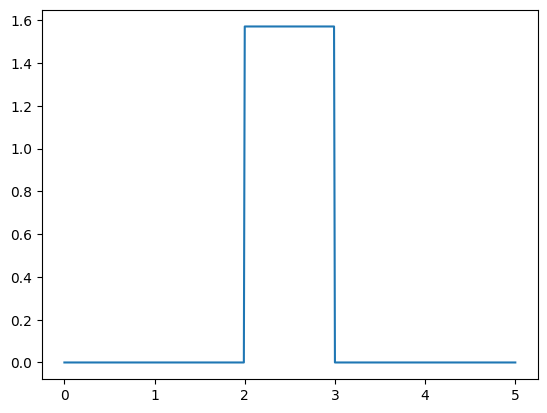

In [85]:
plt.plot(t_robot, u(t_robot)[:,1]);

In [86]:
def Euler_Maryama_method(func, u, x0, T, w):
    x = np.zeros((len(T),3))
    x[0] = x0
    for n in range(1, len(T)):
        dt = T[n] - T[n-1]
        x[n,:] = x[n-1,:] + func(x[n-1,:], u[n-1,:]) * dt + w[n-1]
    return x


In [87]:
Q_robot = np.diag([1,1,1e-1])
Q_robot_discrete = dt_robot*Q_robot
q_robot = np.random.randn(t_robot.shape[0],3)@np.linalg.cholesky(Q_robot)
q_robot_discrete = np.sqrt(dt_robot)*np.random.randn(t_robot.shape[0],3)@np.linalg.cholesky(Q_robot_discrete)

In [88]:
u_robot = u(t_robot)
x_robot_euler_maryama = Euler_Maryama_method(f_robot, u_robot, x_robot_0, t_robot, q_robot_discrete)



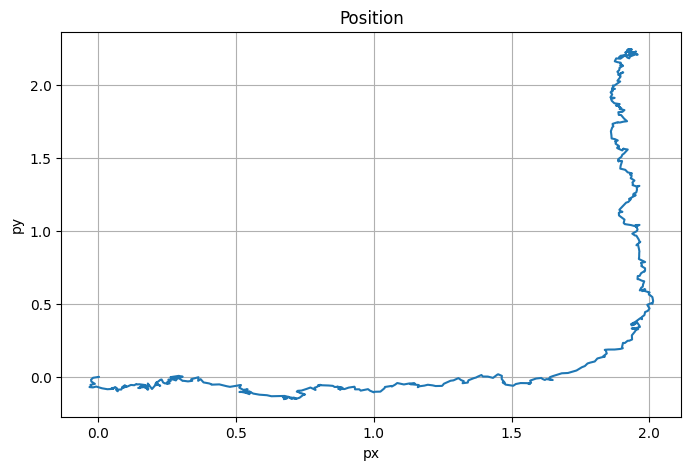

In [89]:
plt.figure(figsize=(8,5))
plt.plot(x_robot_euler_maryama[:,0], x_robot_euler_maryama[:,1])
plt.xlabel('px')
plt.ylabel('py')
plt.title('Position')
plt.grid();


In [49]:
# p32

In [92]:
def robot_jacobian(x,u):
    jac = np.array([ [0, 0,  -u[0] * np.sin(x[2])], 
                     [0, 0,  u[0]*np.cos(x[2])], 
                     [0, 0,  0] ])
    return jac

In [93]:
def linearization_solution(f,jac, t, x0, u, w, dt):
    x = np.zeros((t.shape[0],x0.shape[0]))
    I = np.eye(x0.shape[0])
    x[0] = x0
    for i in range(x.shape[0]-1):
        A = jac(x[i],u[i])
        F = (I + 0.5*A*dt + A@A*dt*dt/2)*dt  # this is an approximation
        x[i+1] = x[i] + F@f(x[i],u[i]) + F@w[i]
    return x


In [94]:
x_linear = linearization_solution(f_robot,
                                  robot_jacobian, 
                                  t_robot, 
                                  x_robot_0, 
                                  u_robot, 
                                  q_robot, 
                                  dt_robot)



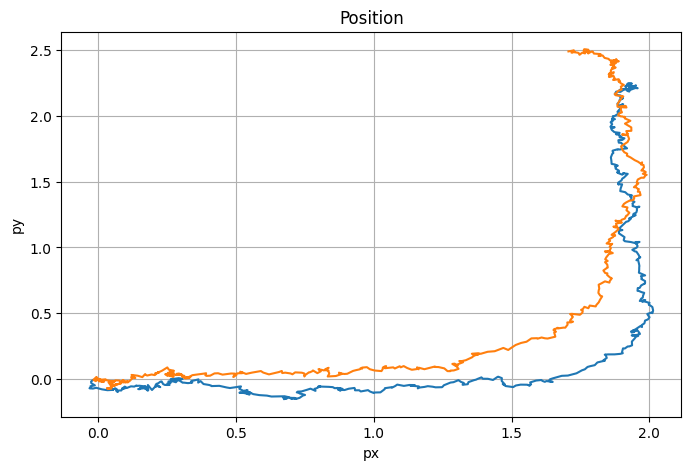

In [96]:

plt.figure(figsize=(8,5))
plt.plot(x_robot_euler_maryama[:,0], x_robot_euler_maryama[:,1])

plt.plot(x_linear[:,0], x_linear[:,1])
plt.xlabel('px')
plt.ylabel('py')
plt.title('Position')
plt.grid();
